<a href="https://colab.research.google.com/github/znumunz/TMAO/blob/main/TMAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[github](https://github.com/znumunz/TMAO)**

#**Import Library**

In [ ]:
from google.colab import drive
import pandas as pd
pd.set_option('display.max_columns', None)   # แสดงทุกคอลัมน์
# pd.set_option('display.width', None)         # ให้ความกว้างไม่จำกัด
# pd.set_option('display.max_colwidth', None)  # ถ้าค่าในคอลัมน์ยาว ก็แสดงทั้งหมด
import string #ใช้สำหรับการเขียนฟังก์ชัน เลือกคอลัมน์ด้วย ชื่อคอลัมน์ A B C


#**Read Data**

In [ ]:
drive.mount('/content/drive')

In [ ]:
# สร้างทางลัดของ path ไปยัง "My Drive" ก่อน จึงจะสามารถอ่านไฟล์จาก path เดียวกันได้

path = "/content/drive/MyDrive/TMAO/Data/__อันนี้_ล่าสุด_Nov_4_2025__of_EGAT04102024_hs_trop_I_AJVICHAI_11.xlsx"
df = pd.read_excel(path)
df.head(3)

#**Choose columns**

In [ ]:
# เลือกคอลัมน์จากชื่อคอลัมน์
data = df[['empn','case','age','sex']]
data.head()

## ฟังก์ชันการเลือกคอลัมน์แบบใช้ชื่อ A B C:F **ได้ในครั้งเดียว**

In [ ]:
def excel_idx(s):
    n = 0
    for c in s.upper():
        n = n * 26 + (ord(c) - 64)
    return n - 1

def pick(df, *args):
    idx = []
    for a in args:
        if ":" in a:
            s, e = a.split(":")
            idx.extend(range(excel_idx(s), excel_idx(e)+1))
        else:
            idx.append(excel_idx(a))
    return df.iloc[:, idx]


In [ ]:
df = pick(df,"V","Y","W","AC","AO","C:S")
df

#**Clean Data**

In [ ]:
df.info()

In [ ]:
df['dead all cause อันนี้'].value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df[df[['wt', 'height', 'waist', 'hip']].isnull().any(axis=1)]

In [ ]:
for col in ['wt', 'height', 'waist', 'hip']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("ค่าว่างในคอลัมน์ 'wt', 'height', 'waist', 'hip' หลังจากเติมค่า:")
print(df[['wt', 'height', 'waist', 'hip']].isnull().sum())

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.isnull().sum()

#**Feature Engineering**

## **Feature Extraction แยกวัน เดือน ปี**

##**คำนวณช่วงเวลาที่มีชีวิต คนที่มีชีวิต สิ้นสุดการรักษา 30/12/2019**

In [ ]:
df['DDATE070809_10y อันนี้'] = pd.to_datetime(df['DDATE070809_10y อันนี้'], errors='coerce')
df['วันที่สิ้นสุดกการรักษา'] = df.apply(lambda row: row['DDATE070809_10y อันนี้'] if row['dead all cause อันนี้'] == 1 else pd.to_datetime('2019-12-30'), axis=1)
df['EnDate.1'] = pd.to_datetime(df['EnDate.1'], errors='coerce')
df['ระยะเวลาติดตาม_days'] = (df['วันที่สิ้นสุดกการรักษา'] - df['EnDate.1']).dt.days
df.head()

#**Data Exploration**

In [ ]:
corre_heatmap = df[['dead all cause อันนี้','age','sex','wt','height','waist','hip','sbpok','dbpok','tc','hdl','ldl','tg','คูณ100','RESULT (ng/L)']]
corre_heatmap.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corre_heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='dead all cause อันนี้', y='RESULT (ng/L)', data=df)
plt.title('Distribution of RESULT (ng/L) by dead all cause')
plt.xlabel('Dead All Cause (0: No, 1: Yes)')
plt.ylabel('RESULT (ng/L)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each group
df_dead_0 = df[df['dead all cause อันนี้'] == 0]
df_dead_1 = df[df['dead all cause อันนี้'] == 1]

# Create subplots for histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram for dead_all_cause = 0
sns.histplot(df_dead_0['RESULT (ng/L)'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('RESULT (ng/L) for Dead All Cause = 0')
axes[0].set_xlabel('RESULT (ng/L)')
axes[0].set_ylabel('Frequency')

# Histogram for dead_all_cause = 1
sns.histplot(df_dead_1['RESULT (ng/L)'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('RESULT (ng/L) for Dead All Cause = 1')
axes[1].set_xlabel('RESULT (ng/L)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='dead all cause อันนี้', y='คูณ100', data=df)
plt.title('Distribution of CV by dead all caus')
plt.xlabel('Dead All Cause (0: No, 1: Yes)')
plt.ylabel('CV')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each group
df_dead_0 = df[df['dead all cause อันนี้'] == 0]
df_dead_1 = df[df['dead all cause อันนี้'] == 1]

# Create subplots for histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram for dead_all_cause = 0
sns.histplot(df_dead_0['คูณ100'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('CV for Dead All Cause = 0')
axes[0].set_xlabel('CV')
axes[0].set_ylabel('Frequency')

# Histogram for dead_all_cause = 1
sns.histplot(df_dead_1['คูณ100'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('CV for Dead All Cause = 1')
axes[1].set_xlabel('CV')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df_dead_1 = df[df['dead all cause อันนี้'] == 1]
df_dead_1['DDATE070809_10y อันนี้'].value_counts()

## **Distribution of 'ระยะเวลาติดตาม_days' for Dead All Cause = 0 and = 1**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ระยะเวลาติดตาม_days', hue='dead all cause อันนี้', bins=30, kde=True)
plt.title('Distribution of ระยะเวลาติดตาม_days by Dead All Cause')
plt.xlabel('ระยะเวลาติดตาม_days')
plt.ylabel('Frequency')
plt.legend(title='Dead All Cause', labels=['Alive', 'Dead'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each group
df_dead_0 = df[df['dead all cause อันนี้'] == 0]
df_dead_1 = df[df['dead all cause อันนี้'] == 1]

# Create subplots for histograms
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Histogram for dead all cause = 0
sns.histplot(df_dead_0['ระยะเวลาติดตาม_days'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of ระยะเวลาติดตาม_days (Dead All Cause = 0 - Alive)')
axes[0].set_xlabel('ระยะเวลาติดตาม_days')
axes[0].set_ylabel('Frequency')

# Histogram for dead all cause = 1
sns.histplot(df_dead_1['ระยะเวลาติดตาม_days'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of ระยะเวลาติดตาม_days (Dead All Cause = 1 - Dead)')
axes[1].set_xlabel('ระยะเวลาติดตาม_days')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **กราฟแสดงช่วงเวลาที่ผู้ป่วยเข้ารับการรักษา ระหว่าง 2 กลุ่ม**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure EnDate.1 is in datetime format and extract year/month
df['EnDate.1'] = pd.to_datetime(df['EnDate.1'], errors='coerce')
df['EnDate.1_year'] = df['EnDate.1'].dt.year
df['EnDate.1_month'] = df['EnDate.1'].dt.month

# Group by year, month, and 'dead all cause อันนี้' to get counts
enrolled_counts = df.groupby(['EnDate.1_year', 'EnDate.1_month', 'dead all cause อันนี้']).size().reset_index(name='count')

# Create a proper datetime column for plotting for a continuous x-axis
enrolled_counts['plot_date'] = pd.to_datetime(
    enrolled_counts['EnDate.1_year'].astype(int).astype(str) + '-' +
    enrolled_counts['EnDate.1_month'].astype(int).astype(str).str.zfill(2) + '-01'
)

# Sort the data by the new datetime column to ensure correct plotting order
enrolled_counts = enrolled_counts.sort_values('plot_date')

plt.figure(figsize=(15, 7))

# Plot with seaborn using the datetime column for x-axis as a line plot
sns.lineplot(data=enrolled_counts, x='plot_date', y='count', hue='dead all cause อันนี้', marker='o')

# Get the current handles and labels from the plot's legend
handles, current_labels = plt.gca().get_legend_handles_labels()

# Define the mapping for the new labels
new_labels_map = {
    '0': 'Alive',
    '1': 'Dead'
}

# Update the labels based on the mapping
updated_labels = [new_labels_map[label] if label in new_labels_map else label for label in current_labels]

plt.title('Number of Patients Enrolled by Month and Year, by Outcome')
plt.xlabel('Enrollment Month-Year')
plt.ylabel('Number of Patients')

# Set x-axis limits to match the actual data range
min_date = enrolled_counts['plot_date'].min()
max_date = enrolled_counts['plot_date'].max()
plt.xlim(mdates.date2num(min_date - pd.Timedelta(days=15)), mdates.date2num(max_date + pd.Timedelta(days=15))) # Convert datetime to numerical for xlim

# Format x-axis ticks for better readability of continuous dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # Show every 3rd month to avoid overcrowding
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

plt.legend(handles=handles, labels=updated_labels, title='Dead All Cause') # Recreate legend with updated labels
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert date
df['EnDate.1'] = pd.to_datetime(df['EnDate.1'], errors='coerce')
df['year'] = df['EnDate.1'].dt.year
df['month'] = df['EnDate.1'].dt.month

# Map outcome
df['Outcome'] = df['dead all cause อันนี้'].map({0: 'Alive', 1: 'Dead'})

# Group real data
g = df.groupby(['year', 'month', 'Outcome']).size().reset_index(name='count')

# Make full month range
start = df['EnDate.1'].min().to_period('M')
end   = df['EnDate.1'].max().to_period('M')
all_months = pd.period_range(start, end, freq='M').to_timestamp()

calendar = pd.DataFrame({
    'plot_date': all_months
})
calendar['year'] = calendar['plot_date'].dt.year
calendar['month'] = calendar['plot_date'].dt.month

# Expand calendar × Outcome (Alive/Dead)
outcomes = ['Alive', 'Dead']
calendar = calendar.assign(key=1).merge(
    pd.DataFrame({'Outcome': outcomes, 'key': 1}),
    on='key'
).drop(columns='key')

# Merge real data into full calendar
merged = calendar.merge(g, on=['year', 'month', 'Outcome'], how='left')
merged['count'] = merged['count'].fillna(0)

# Turn date into YYYY-MM string for display
merged['YM'] = merged['plot_date'].dt.strftime('%Y-%m')

# Plot
plt.figure(figsize=(16, 7))
sns.barplot(data=merged, x='YM', y='count', hue='Outcome')

plt.xticks(rotation=90)
plt.title('Number of Patients Enrolled by Month and Year, by Outcome')
plt.xlabel('Enrollment Month-Year')
plt.ylabel('Number of Patients')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


##**เปรียบเทียบค่าเฉลี่ยแต่ละตัวแปรของสองกลุ่ม**

In [ ]:
comparison_columns = ['age','wt','height','waist','hip','sbpok','dbpok','tc','hdl','ldl','tg','คูณ100','RESULT (ng/L)']
mean_comparison = df.groupby('dead all cause อันนี้')[comparison_columns].mean()
print(mean_comparison)

# Data

In [ ]:
troponin_df = pd.read_excel('/content/drive/MyDrive/TMAO/Data/Data ที่ใช้/troponin_data.xlsx')
troponin_df.head()

In [ ]:
selected_columns = [
    'codePV',
    'age',
    'sex',
    'wt',
    'height',
    'waist',
    'hip',
    'sbpok',
    'dbpok',
    'htn',
    'dm',
    'tc',
    'hdl',
    'ldl',
    'tg',
    'smk2gr',
    'DDATE070809_10y อันนี้',
    'EnDate.1', # Changed from 'EnDate' to 'EnDate.1' as requested
    'GFR4',
    'คูณ100',
    'RESULT (ng/L)',
    'dead all cause อันนี้'
]

selected_df = troponin_df[selected_columns]
selected_df = selected_df.rename(columns={
    'codePV': 'Patient ID',
    'age': 'Age',
    'sex': 'Sex',
    'wt': 'Weight',
    'height': 'Height',
    'waist': 'Waist',
    'hip': 'Hip',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'tc': 'Total Cholesterol',
    'hdl': 'High Density Lipoprotein',
    'ldl': 'Low Density Lipoprotein',
    'tg': 'Triglyceride',
    'smk2gr': 'Smoking',
    'DDATE070809_10y อันนี้': 'Death date',
    'EnDate.1': 'Enroll date', # Changed from 'EnDate' to 'EnDate.1' in rename mapping
    'GFR4': 'Glomerular Filtration Rate',
    'คูณ100': 'CV risk score',
    'RESULT (ng/L)': 'Troponin (ng/L)',
    'dead all cause อันนี้': 'Outcome'
})
selected_df.head()

In [ ]:
selected_df.isnull().sum()

## Missing Value

- เติม Median

Weight	1

Height	1

Waist	6

Hip	6

- เติม Dummy > Unknow

Death date	623

Enroll date	11

Glomerular Filtration Rate	3

In [ ]:
import numpy as np

# Fill numerical columns with their median
for col in ['Weight', 'Height', 'Waist', 'Hip']:
    median_val = selected_df[col].median()
    selected_df[col].fillna(median_val, inplace=True)

selected_df['Death date'].fillna('Unknown', inplace=True)
selected_df['Enroll date'].fillna('Unknown', inplace=True)
selected_df['Glomerular Filtration Rate'].fillna('Unknown', inplace=True)

In [ ]:
selected_df.isnull().sum()

# Data Troponin

In [ ]:
troponin_data = selected_df
troponin_data.head()

In [ ]:
# Convert date columns to datetime, coercing 'Unknown' to NaT
troponin_data['Death date'] = pd.to_datetime(troponin_data['Death date'], errors='coerce')
troponin_data['Enroll date'] = pd.to_datetime(troponin_data['Enroll date'], errors='coerce')

# Define the fixed end date for alive patients
fixed_end_date = pd.to_datetime('2019-12-30')

# Calculate 'Count date'
troponin_data['Count date'] = troponin_data.apply(
    lambda row: (row['Death date'] - row['Enroll date']).days if row['Outcome'] == 1
    else (fixed_end_date - row['Enroll date']).days,
    axis=1
)

# Calculate 'Count month'
troponin_data['Count month'] = troponin_data.apply(
    lambda row:
        (
            (row['Death date'].year - row['Enroll date'].year) * 12 +
            (row['Death date'].month - row['Enroll date'].month)
        ) if row['Outcome'] == 1 and pd.notna(row['Death date']) and pd.notna(row['Enroll date'])
        else (
            (fixed_end_date.year - row['Enroll date'].year) * 12 +
            (fixed_end_date.month - row['Enroll date'].month)
        ) if pd.notna(row['Enroll date'])
        else None, # Handle cases where Enroll date might be NaT
    axis=1
)

# Calculate 'Count year'
troponin_data['Count year'] = troponin_data.apply(
    lambda row:
        (row['Death date'].year - row['Enroll date'].year)
        if row['Outcome'] == 1 and pd.notna(row['Death date']) and pd.notna(row['Enroll date'])
        else (
            fixed_end_date.year - row['Enroll date'].year
        ) if pd.notna(row['Enroll date'])
        else None,
    axis=1
)

troponin_data.head()

In [ ]:
# output_path = '/content/drive/MyDrive/TMAO/Data/Troponin_clean.xlsx'
# troponin_data.to_excel(output_path, index=False)
# print(f"DataFrame saved successfully to {output_path}")

#Data Op 1 original CORE KKU - TMAO 2024-01-09 (1)

In [ ]:
core = pd.read_excel('/content/drive/MyDrive/TMAO/Data/Data ที่ใช้/CORE_TMAO.xlsx')
core.head()

In [ ]:
core_selected_columns = [
    'Pt_ID',
    'Age',
    'Sex',
    'BW',
    'Height',
    'Waist_circumference',
    'sBP',
    'dBP',
    'Hypertension',
    'DM',
    'Total_Cholesterol',
    'HDL',
    'LDL',
    "Triglyceride",
    'SMOKE',
    'Death_date',
    'date_of_visit',
    'EGFR_ckdepi',
    'hs_cTnT',
    'All_death',
    'TMAO_umol_L',
    'Date_Of_Last_FU',
    'time_to_death_month',
]

core_selected_df = core[core_selected_columns]
core_selected_df = core_selected_df.rename(columns={
    'Pt_ID': 'Patient ID',
    'BW' : 'Weight',
    'Waist_circumference' : 'Waist',
    'sBP': 'sbpok',
    'dBP' : 'dbpok',
    'DM' : 'Diabetes Mellitus',
    'Total_Cholesterol' : 'Total Cholesterol',
    'HDL': 'High Density Lipoprotein',
    'LDL': 'Low Density Lipoprotein',
    'SMOKE': 'Smoking',
    'Death_date' : 'Death date',
    'date_of_visit' : 'Enroll date',
    'EGFR_ckdepi' : 'Glomerular Filtration Rate',
    'hs_cTnT' : 'Troponin (ng/L)',
    'All_death' :  'Outcome',
    'time_to_death_month' : 'Count month',
})
core_selected_df.head()

In [ ]:
# output_path = '/content/drive/MyDrive/TMAO/Data/Core TMAO ยังไม่ Clean.xlsx'
# core_selected_df.to_excel(output_path, index=False)
# print(f"DataFrame saved successfully to {output_path}")

# Test stat

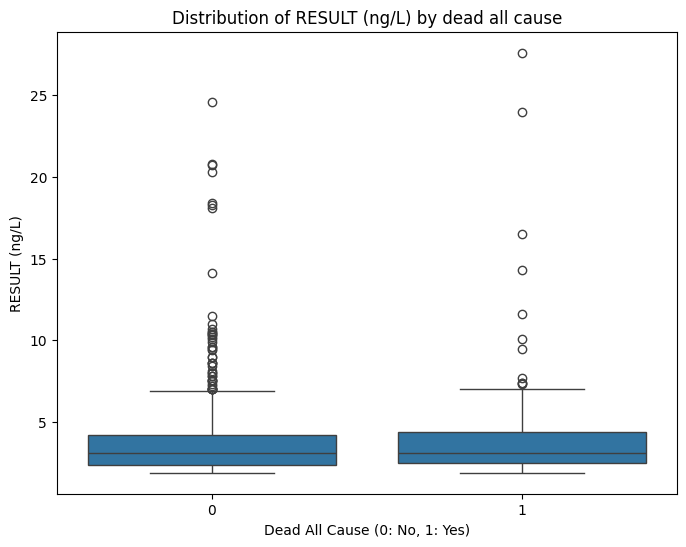

H0 : ค่าเฉลี่ยระดับน้ำตาลของกลุ่มที่ตายและไม่ตาย ไม่แตกต่างกัน

H1 : ค่าเฉลี่ยระดับน้ำตาลของกลุ่มที่ตายและไม่ตาย แตกต่างกัน

Independent t-test

In [ ]:
df.head()

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



troponin = df['RESULT (ng/L)']

# ---------------------------
# 2) Shapiro–Wilk normality test
# ---------------------------
shapiro_stat, shapiro_p = stats.shapiro(troponin)

print("Shapiro-Wilk Test")
print(f"Statistic = {shapiro_stat:.4f}")
print(f"P-value   = {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("=> ข้อมูลมีการกระจายใกล้เคียงปกติ (ไม่ปฏิเสธ H0)")
else:
    print("=> ข้อมูลไม่เป็นการกระจายปกติ (ปฏิเสธ H0)")

# ---------------------------
# 3) พล็อต Histogram + KDE
# ---------------------------
plt.figure(figsize=(6,4))
sns.histplot(troponin, kde=True)
plt.title("Histogram of troponin")
plt.xlabel("troponin")
plt.ylabel("Frequency")
plt.show()

# ---------------------------
# 4) Q-Q Plot เพื่อตรวจสอบการกระจาย
# ---------------------------
plt.figure(figsize=(6,4))
stats.probplot(troponin, dist="norm", plot=plt)
plt.title("Q-Q Plot of troponin")
plt.show()


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1) ตัวอย่างข้อมูลน้ำตาล
# ---------------------------
troponin = df['RESULT (ng/L)']

# คำนวณค่า mean และ sd
mu = np.mean(troponin)
sigma = np.std(troponin, ddof=1)

print(f"Mean = {mu:.2f}, SD = {sigma:.2f}")

# ---------------------------
# 2) Kolmogorov–Smirnov test
# ---------------------------
ks_stat, ks_p = stats.kstest(
    (troponin - mu) / sigma,   # normalize ข้อมูลก่อน
    'norm'
)

print("\nKolmogorov–Smirnov Test (K-S test)")
print(f"Statistic = {ks_stat:.4f}")
print(f"P-value   = {ks_p:.4f}")

if ks_p > 0.05:
    print("=> ข้อมูลมีการกระจายใกล้เคียงปกติ (ไม่ปฏิเสธ H0)")
else:
    print("=> ข้อมูลไม่เป็นการกระจายปกติ (ปฏิเสธ H0)")

# ---------------------------
# 3) Histogram + KDE
# ---------------------------
plt.figure(figsize=(6,4))
sns.histplot(troponin, kde=True)
plt.title("Histogram of troponin")
plt.xlabel("troponin")
plt.ylabel("Frequency")
plt.show()

# ---------------------------
# 4) Q-Q Plot
# ---------------------------
plt.figure(figsize=(6,4))
stats.probplot(troponin, dist="norm", plot=plt)
plt.title("Q-Q Plot of troponin")
plt.show()


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1) ตัวอย่างข้อมูลน้ำตาล
# ---------------------------
troponin = df['RESULT (ng/L)']

# คำนวณค่า mean และ sd
mu = np.mean(troponin)
sigma = np.std(troponin, ddof=1)

print(f"Mean = {mu:.2f}, SD = {sigma:.2f}")

# ---------------------------
# 2) Kolmogorov–Smirnov test
# ---------------------------
from scipy.stats import kstest, norm

ks_stat, ks_p = kstest(troponin, norm(loc=mu, scale=sigma).cdf)

print("\nKolmogorov–Smirnov Test (K-S test)")
print(f"Statistic = {ks_stat:.4f}")
print(f"P-value   = {ks_p:.4f}")

if ks_p > 0.05:
    print("=> ข้อมูลมีการกระจายใกล้เคียงปกติ (ไม่ปฏิเสธ H0)")
else:
    print("=> ข้อมูลไม่เป็นการกระจายปกติ (ปฏิเสธ H0)")

# ---------------------------
# 3) Histogram + KDE
# ---------------------------
plt.figure(figsize=(6,4))
sns.histplot(troponin, kde=True)
plt.title("Histogram of troponin")
plt.xlabel("troponin")
plt.ylabel("Frequency")
plt.show()

# ---------------------------
# 4) Q-Q Plot
# ---------------------------
plt.figure(figsize=(6,4))
stats.probplot(troponin, dist="norm", plot=plt)
plt.title("Q-Q Plot of troponin")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

# ---------------------------
# 1) ตัวอย่างข้อมูล
# ---------------------------
# สถานะการตาย: 0 = ไม่ตาย, 1 = ตาย
status = df['dead all cause อันนี้']

# ค่าน้ำตาลหรือ troponin (ตัวแปรต่อเนื่อง)
troponin = df['RESULT (ng/L)']

# ---------------------------
# 2) แยกข้อมูลเป็น 2 กลุ่ม
# ---------------------------
group_dead = troponin[status == 1]      # กลุ่มตาย
group_alive = troponin[status == 0]     # กลุ่มไม่ตาย

print("กลุ่มตาย:", group_dead)
print("กลุ่มไม่ตาย:", group_alive)

# ---------------------------
# 3) Mann-Whitney U test
# ---------------------------
u_stat, p_value = mannwhitneyu(group_dead, group_alive, alternative='two-sided')

print("\nMann–Whitney U Test")
print(f"U statistic = {u_stat}")
print(f"P-value     = {p_value:.4f}")

if p_value < 0.05:
    print("=> สรุป: ค่าตัวแปรทั้งสองกลุ่มแตกต่างกันอย่างมีนัยสำคัญทางสถิติ")
else:
    print("=> สรุป: ไม่พบความแตกต่างอย่างมีนัยสำคัญทางสถิติ")


In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# สถานะ: 0 = ไม่ตาย, 1 = ตาย
status = df['dead all cause อันนี้']
troponin = df['RESULT (ng/L)']

# แยกกลุ่ม
group_dead = troponin[status == 1]
group_alive = troponin[status == 0]

# Independent t-test
t_stat, p_value = ttest_ind(group_dead, group_alive, equal_var=False)

print("Independent t-test")
print("T-statistic =", t_stat)
print("P-value     =", p_value)
